<a href="https://colab.research.google.com/github/cherryycodes/LSTM-model-for-Human-Activity-Recognition/blob/main/LSTM_brief.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
import plotly.express as px
import plotly.figure_factory as ff
import os
from keras import layers
from keras.callbacks import EarlyStopping

# Importing necessary libraries

import warnings
warnings.filterwarnings("ignore")

# Ignore warnings to keep the output clean

from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

# Mounting Google Drive to access the dataset or other files

Mounted at /content/gdrive/


In [2]:
from collections import Counter

# Importing the Counter class from the collections module

features = list()

# Initializing an empty list to store the features

with open('/content/gdrive/MyDrive/UCIdataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]

# Opening the 'features.txt' file stored in the specified path and reading its contents
# Each line in the file contains a feature name, and we extract the second element from each line (index 1)
# We store the extracted feature names in the 'features' list

print('No of Features: {}'.format(len(features)))

# Printing the number of features by formatting the length of the 'features' list

No of Features: 561


In [3]:
# Read the train and test CSV files into DataFrames and printing the shape
train_df = pd.read_csv("/content/gdrive/MyDrive/archive/train.csv")
test_df = pd.read_csv("/content/gdrive/MyDrive/archive/test.csv")
print(train_df.shape)
print(test_df.shape)

(7352, 563)
(2947, 563)


In [4]:
train_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [5]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [6]:
# Drop the "Activity" and "subject" columns from the training and test dataframes
train_features = train_df.drop(["Activity", "subject"], axis=1)
test_features = test_df.drop(["Activity", "subject"], axis=1)

# Replace the activity labels with numeric values in the training and test labels
train_labels = train_df["Activity"].replace(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], [0, 1, 2, 3, 4, 5])
test_labels = test_df["Activity"].replace(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], [0, 1, 2, 3, 4, 5])

# Print the shapes of the training and test features and labels
print(train_features.shape)  # Shape of the training features dataframe
print(test_features.shape)  # Shape of the test features dataframe
print(train_labels.shape)  # Shape of the training labels series
print(test_labels.shape)  # Shape of the test labels series

(7352, 561)
(2947, 561)
(7352,)
(2947,)


In [7]:
# Get the columns of the train_df dataframe
columns = train_df.columns

# Print the shape of the columns array
print(columns.shape)

# Print the content of the columns array
columns

(563,)


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

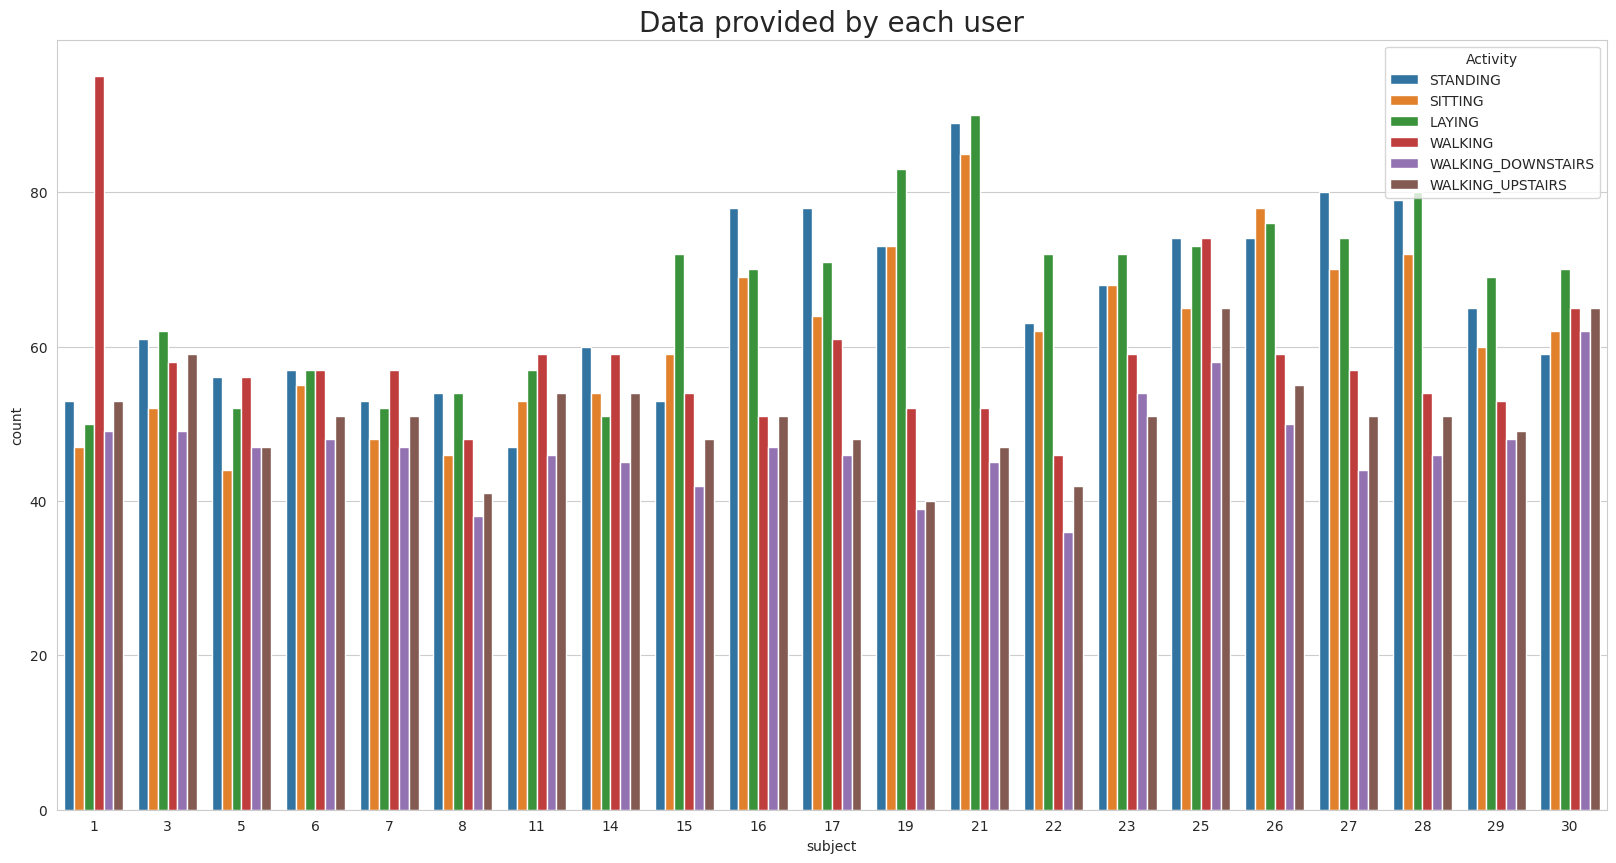

In [8]:
# Set the style of the plot to 'whitegrid'
sns.set_style('whitegrid')

# Create a new figure with a specific size
plt.figure(figsize=(20, 10))

# Set the title of the plot
plt.title('Data provided by each user', fontsize=20)

# Create a countplot using the train_df dataframe
# The x-axis represents the 'subject' column, and the hue represents the 'Activity' column
sns.countplot(x='subject', hue='Activity', data=train_df)

# Display the plot
plt.show()

In [9]:
# Create a countplot using Plotly Express
fig = px.histogram(train_df, x='subject', color='Activity', barmode='group')
# Set the title of the plot
fig.update_layout(title='Data provided by each user', title_font_size=20)
# Display the plot
fig.show()

In [10]:
px.histogram(train_df,x='Activity',color='Activity',title='Number of recordings per activity')

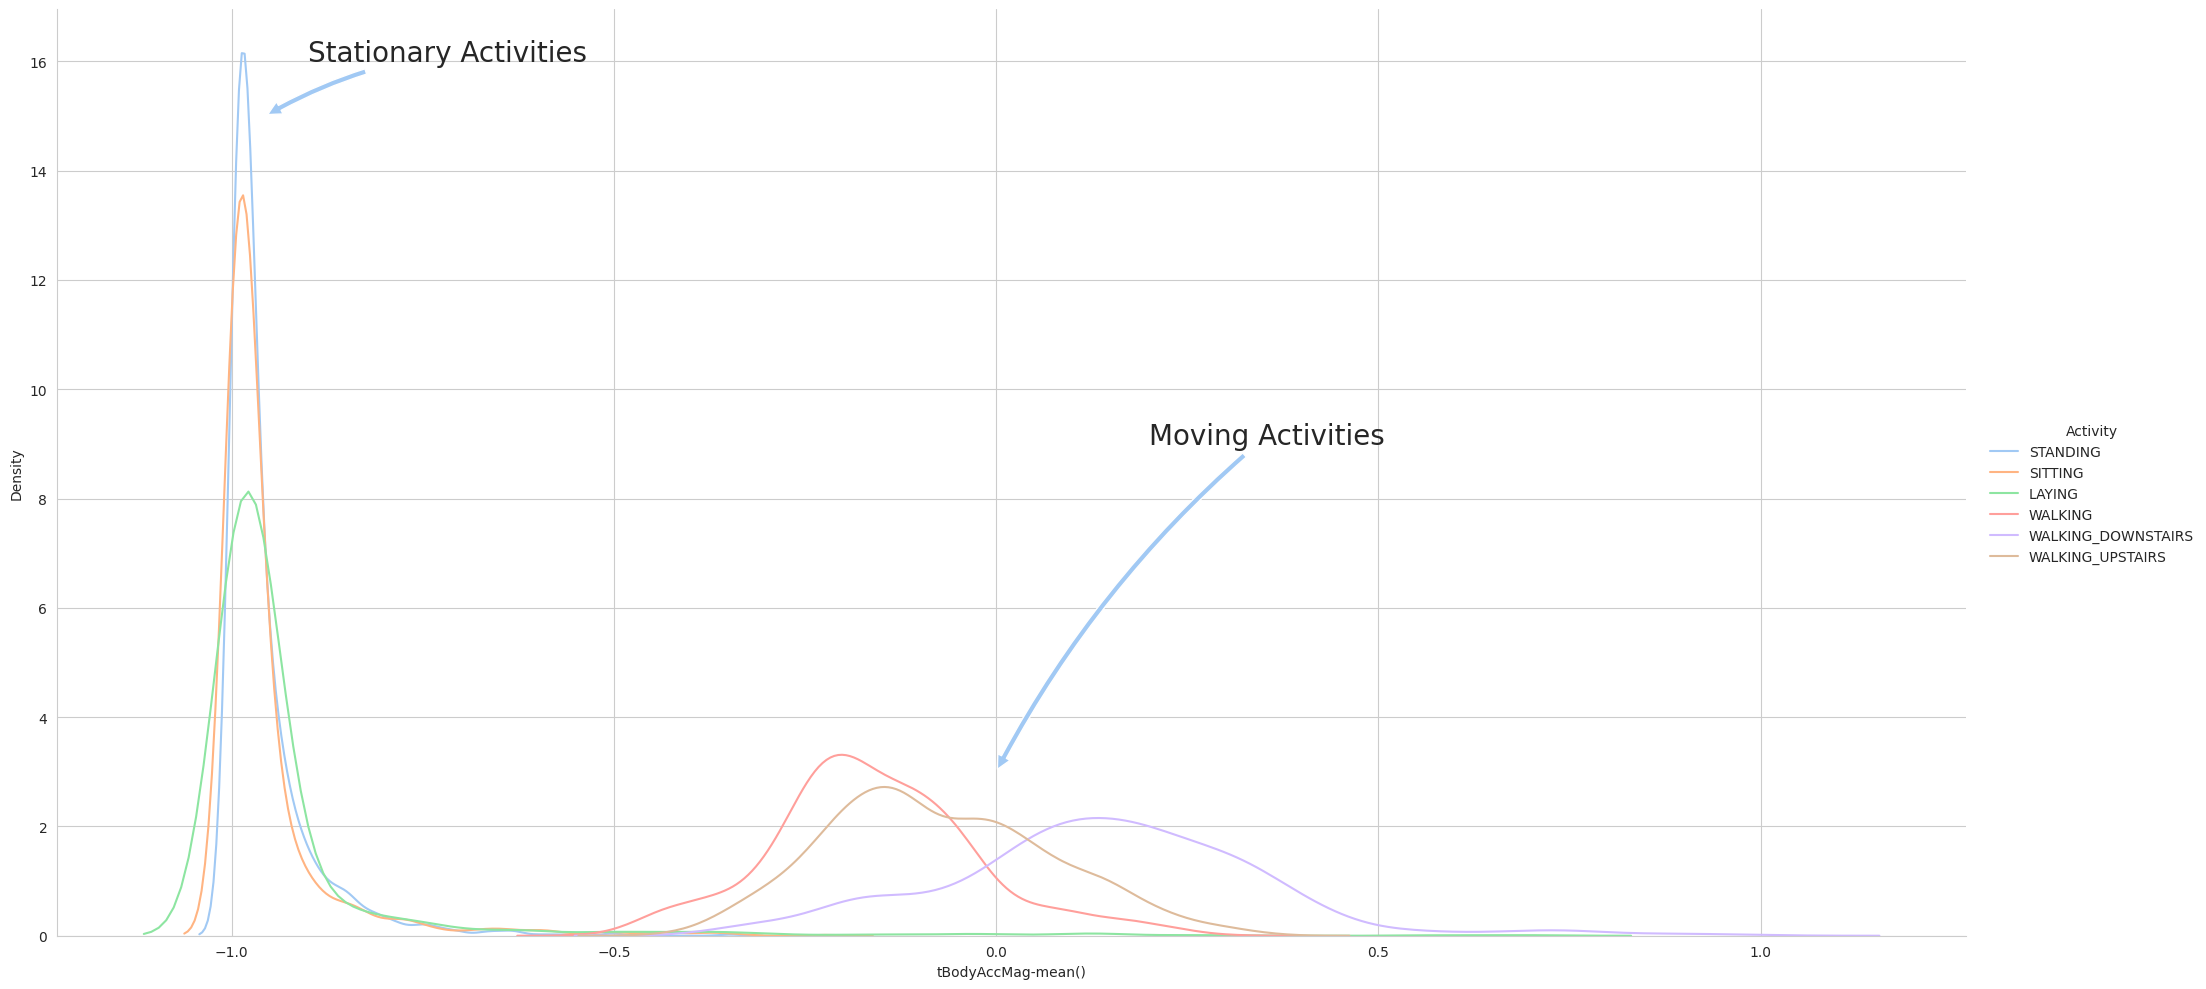

In [11]:
# Set the color palette
sns.set_palette("pastel")

# Create a FacetGrid with hue='Activity' to display different activities with different colors
facetgrid = sns.FacetGrid(train_df, hue='Activity', height=10, aspect=2)

# Map the distplot onto the FacetGrid, plotting the 'tBodyAccMag-mean()' column
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist=False)

# Add a legend to the plot
facetgrid.add_legend()

# Add annotations to indicate stationary and moving activities
plt.annotate("Stationary Activities", xy=(-0.956, 15), xytext=(-0.9, 16), size=20, arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy=(0, 3), xytext=(0.2, 9), size=20, arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

# Show the plot
plt.show()

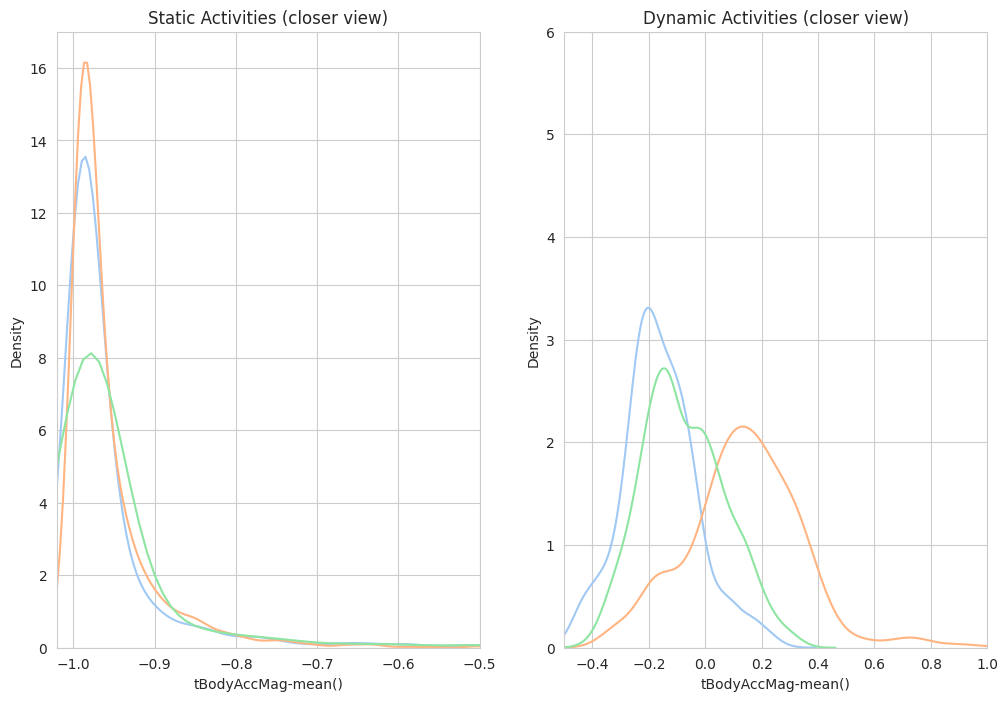

In [12]:
# Create a new figure with a specific size
plt.figure(figsize=(12, 8))

# Create the left subplot for static activities
plt.subplot(1, 2, 1)

# Set the title for the left subplot
plt.title("Static Activities (closer view)")

# Define the static activities to plot
static_activities = ["SITTING", "STANDING", "LAYING"]

# Iterate over each static activity
for activity in static_activities:
    sns.distplot(train_df[train_df["Activity"] == activity]['tBodyAccMag-mean()'], hist=False, label=activity)

# Set the x-axis and y-axis limits for the left subplot
plt.axis([-1.02, -0.5, 0, 17])

# Create the right subplot for dynamic activities
plt.subplot(1, 2, 2)

# Set the title for the right subplot
plt.title("Dynamic Activities (closer view)")

# Define the dynamic activities to plot
dynamic_activities = ["WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"]

# Iterate over each dynamic activity
for activity in dynamic_activities:
    sns.distplot(train_df[train_df["Activity"] == activity]['tBodyAccMag-mean()'], hist=False, label=activity)

# Set the x-axis and y-axis limits for the right subplot
plt.axis([-0.50, 1.00, 0, 6])

# Display the figure
plt.show()

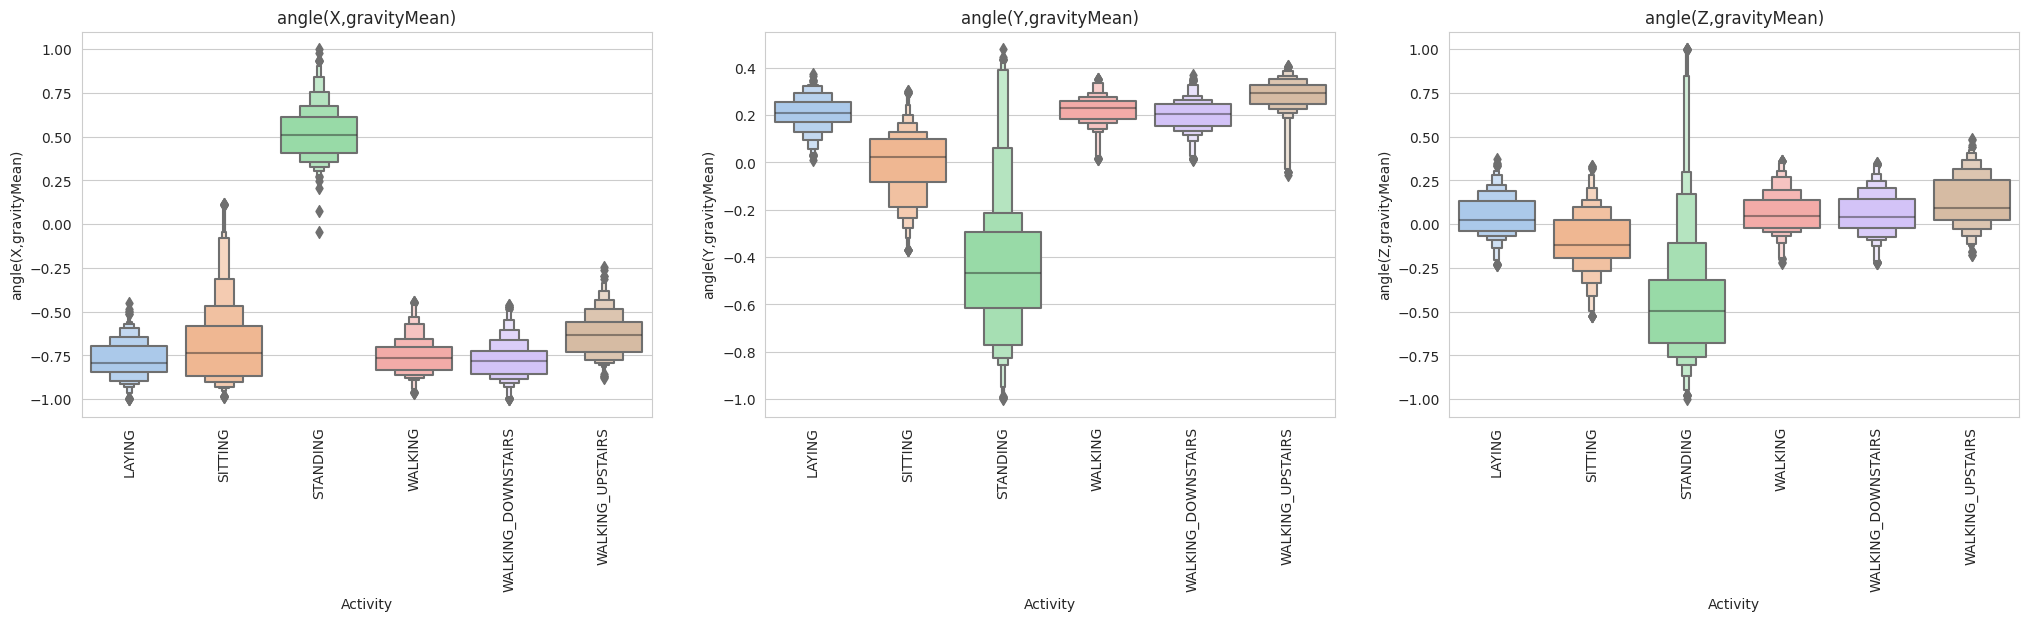

In [13]:
# Create a figure with 1 row and 3 columns, and set the size of the figure
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

# Plot a boxenplot for 'angle(X,gravityMean)' for each activity
sns.boxenplot(ax=axs[0], x="Activity", y="angle(X,gravityMean)", data=train_df)

# Plot a boxenplot for 'angle(Y,gravityMean)' for each activity
sns.boxenplot(ax=axs[1], x="Activity", y="angle(Y,gravityMean)", data=train_df)

# Plot a boxenplot for 'angle(Z,gravityMean)' for each activity
sns.boxenplot(ax=axs[2], x="Activity", y="angle(Z,gravityMean)", data=train_df)

# Set the title for the first subplot
axs[0].set_title("angle(X,gravityMean)")

# Set the x-axis tick labels for the first subplot
axs[0].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], rotation="vertical")

# Set the title for the second subplot
axs[1].set_title("angle(Y,gravityMean)")

# Set the x-axis tick labels for the second subplot
axs[1].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], rotation="vertical")

# Set the title for the third subplot
axs[2].set_title("angle(Z,gravityMean)")

# Set the x-axis tick labels for the third subplot
axs[2].set_xticklabels(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'], rotation="vertical")

# Display the plot
plt.show()

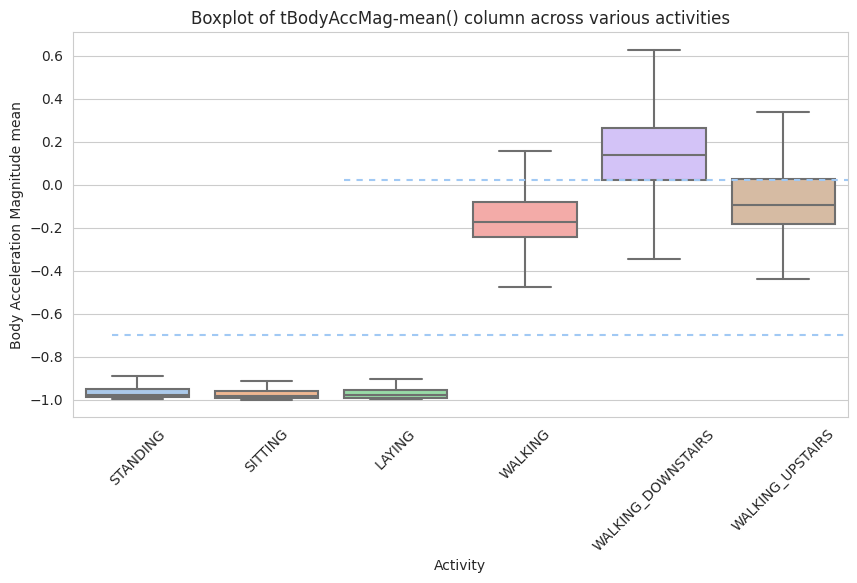

In [14]:
# Create a figure with a specific size
plt.figure(figsize=(10, 5))

# Plot a boxplot for 'tBodyAccMag-mean()' for each activity, excluding outliers
sns.boxplot(x='Activity', y='tBodyAccMag-mean()', data=train_df, showfliers=False)

# Set the label for the y-axis
plt.ylabel('Body Acceleration Magnitude mean')

# Set the title of the plot
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")

# Add a horizontal dashed line at y=-0.7 with a starting point at 0.05 on the x-axis
plt.axhline(y=-0.7, xmin=0.05, dashes=(3, 3))

# Add a horizontal dashed line at y=0.020 with a starting point at 0.35 on the x-axis
plt.axhline(y=0.020, xmin=0.35, dashes=(3, 3))

# Rotate the x-axis tick labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [15]:
from keras.optimizers import adam

def LSTM_Model(data):
    # Create a sequential model
    model = keras.Sequential(name="LSTM_Sequential")

    # Add an LSTM layer with 32 units and "tanh" activation
    model.add(layers.LSTM(32, activation="tanh", name="LSTM"))

    # Add a dense layer with 64 units and "relu" activation
    model.add(layers.Dense(64, activation="relu", name="dense_1"))

    # Add a dropout layer to prevent overfitting
    model.add(layers.Dropout(0.2))

    # Add an output layer with 6 units and "softmax" activation
    model.add(layers.Dense(6, activation="softmax", name="output"))

    # Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [16]:
# Reshape the train_features array to have the shape (number of samples, number of time steps, number of features)
train_features = train_features.values.reshape(train_features.shape[0], train_features.shape[1], 1)

# Reshape the test_features array to have the shape (number of samples, number of time steps, number of features)
test_features = test_features.values.reshape(test_features.shape[0], test_features.shape[1], 1)

In [17]:
# Create an LSTM model using the LSTM_Model function
lstm_model = LSTM_Model(train_features)

# Build the LSTM model
lstm_model.build(input_shape=train_features.shape)

# Print the summary of the LSTM model
lstm_model.summary()

# Define early stopping with patience of 30, monitoring validation accuracy, and restoring the best weights
earlystopping = EarlyStopping(patience=30, monitor="val_accuracy", restore_best_weights=True)

# Fit the LSTM model to the training data, using 20 epochs and the defined early stopping callback
lstm_history = lstm_model.fit(train_features, train_labels, epochs=25, callbacks=[earlystopping], validation_data=(test_features, test_labels))

Model: "LSTM_Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM (LSTM)                 (7352, 32)                4352      
                                                                 
 dense_1 (Dense)             (7352, 64)                2112      
                                                                 
 dropout (Dropout)           (7352, 64)                0         
                                                                 
 output (Dense)              (7352, 6)                 390       
                                                                 
Total params: 6,854
Trainable params: 6,854
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
230/230 [==============================] - 64s 264ms/step - loss: 1.6993 - accuracy: 0.2673 - val_loss: 1.7315 - val_accuracy: 0.4181
Epoch 2/25
230/230 [================

In [18]:
def Graph_Drawing(history, title):
    # Create an array of x values representing the number of epochs
    x = np.arange(len(history.history["val_accuracy"]))

    # Plot the training loss
    plt.plot(x, history.history["loss"], label="loss")

    # Plot the validation loss
    plt.plot(x, history.history["val_loss"], label="val_loss")

    # Plot the training accuracy
    plt.plot(x, history.history["accuracy"], label="accuracy")

    # Plot the validation accuracy
    plt.plot(x, history.history["val_accuracy"], label="val_accuracy")

    # Set the title of the plot
    plt.title(title)

    # Display a legend on the plot
    plt.legend()

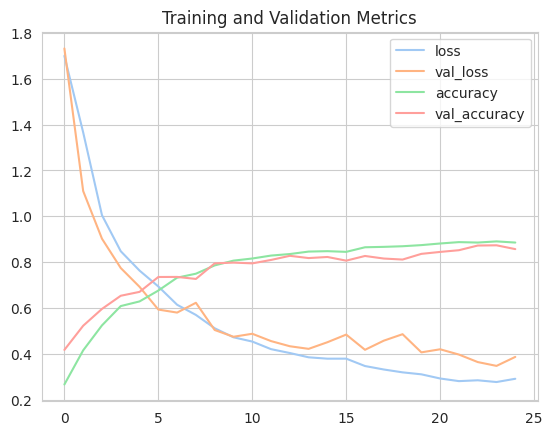

In [19]:
Graph_Drawing(lstm_history, "Training and Validation Metrics")
plt.show()